# Exercise 04 - Due Friday, October 21 at 12pm

*Objectives*: Gain experience loading a CSV dataset into a database model you define yourself and using SQL to explore its contents. Explore the data by writing and executing a number of SQL queries using common syntax and functions and describing your findings.

*Grading criteria*: The tasks should all be completed, and questions should all be answered with SQL queries in the space provided, unless a text answer is requested. Results should be correct, according to the embedded tests. The notebook itself should be completely reproducible; from start to finish, another person should be able to use the same code to obtain the same results as yours.  Note that you will receive no more than partial credit if you do not add text/markdown cells explaining your thinking at each major step in each problem.

*Deadline*: Friday, October 21, 12pm. Submit your notebook to Blackboard and push it to your GitHub repository.

## Setup - obtain data and create database

The US City Open Data Census has data on [restaurant inspections from all over the country](http://us-city.census.okfn.org/dataset/food-safety).  Let's take a look at data from Albuquerque.  *Note*: metadata and other details for this dataset are available at http://data.cabq.gov/business/foodinspections/.

Fyi, to save you a step, I've converted this file into a clean CSV file by using the `dos2unix` command to change its line endings and to switch it to use commas instead of tabs using `csvformat -t inputfile.csv > outputfile.csv`.

First we download the dataset:

In [1]:
!wget https://raw.githubusercontent.com/gwsb-istm-6212-fall-2016/syllabus-and-schedule/master/exercises/abq-food-inspections-fy2010.csv

--2016-10-20 19:37:46--  https://raw.githubusercontent.com/gwsb-istm-6212-fall-2016/syllabus-and-schedule/master/exercises/abq-food-inspections-fy2010.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.32.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.32.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5025226 (4.8M) [text/plain]
Saving to: ‘abq-food-inspections-fy2010.csv.2’

abq-food-inspection 100%[=====================>]   4.79M  --.-KB/s   in 0.09s  

2016-10-20 19:37:47 (50.8 MB/s) - ‘abq-food-inspections-fy2010.csv.2’ saved [5025226/5025226]



## Problem 1 - examine the data (35 points)

Use `csvstat` and other tools as you see fit and observe its contents.  Review the metadata definitions linked to above.  Describe what you see:  What do all the columns mean?  Are there null values?  Which columns interest you the most?  Which columns present some complications or questions you would like to ask?

Insert a combination of code and text/markdown cells here to review the data and describe what you find.

First, I will get an overview of the data by using head.

In [2]:
!head 'abq-food-inspections-fy2010.csv'

FACILITY_NAME,FACILITY_KEY,SITE_ADDRESS,CITY,STATE,ZIP,OWNER_KEY,OWNER_NAME,NATURE_OF_BUSINESS,STREET_NUMBER,STREET_NAME,STREET_TYPE,POST_DIRECTIONAL,PHONE,PROGRAM_CATEGORY,PROGRAM_CATEGORY_DESCRIPTION,INSPECTION_DATE,INSPECTION_TYPE,INSPECTION_DESC,SERIAL_NUM,ACTION_CODE,ACTION_DESC,RESULT_CODE,RESULT_DESC,VIOLATION_CODE,VIOLATION_DESC,INSPECTION_MEMO
00BSAY IT WITH CAKE,50534,10200 GOLF COURSE RD NW STE B,ALBUQUERQUE,NM,87114,47341,OOBSAY IT WITH CAKE,CAKE DECORATING,10200,GOLF COURSE,RD,NW,5058339563,0405,Food Processor,2009-10-21 00:00:00,,EMERGENCY RESPONSE,DA8009125,00,NON-GRADED,00,NOT APPLICABLE,    68    ,Delivered Informational Brochure,
00BSAY IT WITH CAKE,50534,10200 GOLF COURSE RD NW STE B,ALBUQUERQUE,NM,87114,47341,OOBSAY IT WITH CAKE,CAKE DECORATING,10200,GOLF COURSE,RD,NW,5058339563,0405,Food Processor,2009-10-21 00:00:00,,ROUTINE FOOD INSPECTION,DA8009123,11,APPROVED,03,IN COMPLIANCE,    00    ,No Violations Found,
00BSAY IT WITH CAKE,50534,10200 GOLF COURSE RD NW STE 

Find out how many rows are in the csv

In [3]:
!wc -l 'abq-food-inspections-fy2010.csv'

17557 abq-food-inspections-fy2010.csv


Find out all of the column names in the csv

In [4]:
!csvcut -n 'abq-food-inspections-fy2010.csv'

  1: FACILITY_NAME
  2: FACILITY_KEY
  3: SITE_ADDRESS
  4: CITY
  5: STATE
  6: ZIP
  7: OWNER_KEY
  8: OWNER_NAME
  9: NATURE_OF_BUSINESS
 10: STREET_NUMBER
 11: STREET_NAME
 12: STREET_TYPE
 13: POST_DIRECTIONAL
 14: PHONE
 15: PROGRAM_CATEGORY
 16: PROGRAM_CATEGORY_DESCRIPTION
 17: INSPECTION_DATE
 18: INSPECTION_TYPE
 19: INSPECTION_DESC
 20: SERIAL_NUM
 21: ACTION_CODE
 22: ACTION_DESC
 23: RESULT_CODE
 24: RESULT_DESC
 25: VIOLATION_CODE
 26: VIOLATION_DESC
 27: INSPECTION_MEMO


Use csvstat to get a summary of the data in each column.

In [5]:
!csvstat 'abq-food-inspections-fy2010.csv'

  1. FACILITY_NAME
	<class 'str'>
	Nulls: False
	Unique values: 2615
	5 most frequent values:
		SMITHS FOOD AND DRUG CENTERS INC:	154
		ISOTOPES PARK - OVATIONS:	93
		PER EHSII CECELIA GARCIA OOB LA REYNA DEL SUR:	85
		ISLETA AMPHITHEATER:	68
		ECHO INC:	68
	Max length: 77
  2. FACILITY_KEY
	<class 'int'>
	Nulls: False
	Min: 13
	Max: 101482
	Sum: 820405773
	Mean: 46730.79135338346
	Median: 50866.0
	Standard Deviation: 32659.794578837962
	Unique values: 2835
	5 most frequent values:
		46323:	93
		65863:	85
		32817:	68
		80949:	68
		91825:	66
  3. SITE_ADDRESS
	<class 'str'>
	Nulls: True
	Unique values: 2456
	5 most frequent values:
		1601 AVENIDA CESAR CHAVEZ SE:	94
		644 OLD COORS BLVD SW:	85
		8601 CENTRAL AV NE:	77
		2200 SUNPORT BLVD SE:	75
		5210 CENTRAL AV SE:	73
	Max length: 35
  4. CITY
	<class 'str'>
	Nulls: False
	Values: ALBUQUERQUE
  5. STATE
	<class 'str'>
	Nulls: False
	Values: 87, NM
  6. ZIP
	<class 'str'>
	Nulls: False
	Unique values: 48
	5 most frequent values:
		87110

## Columns
  1: FACILITY_NAME : The name of the facility
  
  2: FACILITY_KEY : a numerical identifier of the facility
  
  3: SITE_ADDRESS : the street address of the facility including street number
  
  4: CITY : the city of the facility (in this case, always Albuquerque)
  
  5: STATE : the state of the facility (in this case, always NM)
  
  6: ZIP : the zip code of the facility
  
  7: OWNER_KEY : a numerical identifier of the owner
  
  8: OWNER_NAME : the name of the parent company or owner
  
  9: NATURE_OF_BUSINESS : the type of business that the facility is (ie, grocery)
  
 10: STREET_NUMBER : the street number of the facility address
 
 11: STREET_NAME : the name of the street of the facility address
 
 12: STREET_TYPE : second part of street name (ie, rd, dr, blvd)
 
 13: POST_DIRECTIONAL : the direction of the street (ie, NW)
 
 14: PHONE : telephone number of the facility
 
 15: PROGRAM_CATEGORY : numerical identifier of the program category
 
 16: PROGRAM_CATEGORY_DESCRIPTION : description of the program category
 
 17: INSPECTION_DATE : date of the inspection
 
 18: INSPECTION_TYPE : type of inspection (all values are null)
 
 19: INSPECTION_DESC : description of type of inspection
 
 20: SERIAL_NUM : nine-character identifier
 
 21: ACTION_CODE : two-digit identifier of action
 
 22: ACTION_DESC : description of action
 
 23: RESULT_CODE : two-digit identifier of result
 
 24: RESULT_DESC : description of result
 
 25: VIOLATION_CODE : code indicating violation
 
 26: VIOLATION_DESC : description of violation
 
 27: INSPECTION_MEMO :inspection memo (all values are null)

Null values do exist in the data, so this will be something to watch out for. Of interest to me are the facility_key, inspection_date, action_code, result_code, and violation_code. These variables have the potential to tell us what violations have occurred at a facility and in what order. Perhaps we can see if a facility "learned its lesson" from previous violations by not repeating the same mistakes.

I am not entirely sure what the serial_num is for-- what is being serialized? The facility, or the inspection? It can't be the inspection, because these values are not unique. Also, is the inspection_memo just a "junk dimension" type of column, like a "catch-all"? It doesn't seem to have caught anything thus far.

## Problem 2 - define a database model and load the data (35 points)

Based on what you found above, create and connect to a new database, define a database table in it, and load this dataset into it.  You may use either of the methods for this step you have seen in earlier class notebooks.  You may choose to eliminate variables/columns if they are not relevant or interesting to you - explain your reasoning if you do.  Either way, you should load a majority of the columns present in the source dataset into the database and all of its rows.

Once your data has loaded successfully, run a `COUNT(*)` query to verify that all the data has loaded correctly.

Insert a combination of code and text/markdown cells here to connect to your database, define your table, load its data, and verify the loaded records.

Load sql

In [6]:
%load_ext sql

/opt/conda/lib/python3.5/site-packages/IPython/config.py:13: ShimWarning: The `IPython.config` package has been deprecated. You should import from traitlets.config instead.
  "You should import from traitlets.config instead.", ShimWarning)
/opt/conda/lib/python3.5/site-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")


Create database called "exercise4"

In [7]:
!createdb -U dbuser exercise4

createdb: database creation failed: ERROR:  database "exercise4" already exists


Connect to the exercise4 database

In [8]:
%sql postgresql://dbuser@localhost:5432/exercise4

'Connected: dbuser@exercise4'

Create a unique table called food_inspections that contains the data from the food inspections csv

In [9]:
%%sql
DROP TABLE IF EXISTS food_inspections;
CREATE TABLE food_inspections (
    
    facility_name VARCHAR(128),
    facility_key INTEGER,
    site_address VARCHAR(64),
    city VARCHAR(12),
    state VARCHAR(2),
    zipcode VARCHAR(11),
    owner_key VARCHAR(12),
    owner_name VARCHAR(128),
    bus_nature VARCHAR(64),
    street_num VARCHAR(12),
    street_name VARCHAR(64),
    street_type VARCHAR(4),
    post_direct VARCHAR(2),
    phone VARCHAR(16),
    prog_cat INTEGER,
    prog_cat_desc VARCHAR(64),
    insp_date TIMESTAMP,
    insp_type VARCHAR(64),
    insp_desc VARCHAR(64),
    serial_num VARCHAR(64),
    action_code INTEGER,
    action_desc VARCHAR(64),
    result_code INTEGER,
    result_desc VARCHAR(64),
    viol_code VARCHAR(12),
    viol_desc VARCHAR(64),
    insp_memo VARCHAR(64)
    
)

Done.
Done.


[]

Verify the working directory and use that directory to put the csv data into the exercise4 database

In [10]:
!pwd

/home/jovyan/work


In [11]:
%%sql
COPY food_inspections FROM '/home/jovyan/work/abq-food-inspections-fy2010.csv'
CSV
HEADER
QUOTE '"'
DELIMITER ',';

17556 rows affected.


[]

Count the rows in food_inspections to be sure all of the data loaded

In [12]:
%%sql
SELECT count(*) from food_inspections;

1 rows affected.


count
17556


## Problem 3 - explore your data (30 points)

Now that the data is loaded, ask some questions of it!  Identify key variables of interest and note their ranges along with other useful descriptive statistics.  Choose and define a few lines of inquiry, execute queries for each, and describe what you find in your result sets.  Use any query techniques we've seen in class, including aggregate functions, transformations, subqueries, or others as appropriate. 

If you find interesting patterns, adding plots to your exploration would be useful.

Insert a combination of code and text/markdown cells here to explore your data.

First, let's find all of distinct values for violation code and description.

In [13]:
%%sql
SELECT DISTINCT viol_code, viol_desc 
FROM food_inspections;

134 rows affected.


viol_code,viol_desc
None,None
04 59,OBSERVATIONS
04,Cooking Temperatures
04 09,"Smoking, Eating, Drinking"
04 21,Improper sanitizing
56,Notice Statement
32,Improper storage/handling of clean equipment/utens
04 60,Complaint Substantiated
46,Other Operations - Lighting
16,"Inadequate water source, Hot or cold"


It appears that the violation code is a combination of two-digit codes. Therfore, some of the descriptions repeat because they are associated with different combinations of two-digit violation codes.

Let's whittle this down to just find the violation codes where the description contains "rodents."

In [14]:
%%sql
SELECT DISTINCT viol_code, viol_desc
FROM food_inspections
WHERE viol_desc LIKE '%rodent%';

4 rows affected.


viol_code,viol_desc
28,"Insect, rodents, animals - Other"
04 27,Evidence of rodents
04 28,"Insect, rodents, animals - Other"
27,Evidence of rodents


Ok, so it looks like viol_code 28 is "Insect, rodents, animals - Other" and viol_code 27 is "Evidence of rodents."

Now let's see how many rows contain either viol_code 27 or 28.

In [15]:
%%sql
SELECT count(*)
FROM food_inspections
WHERE viol_code LIKE '%28%' OR viol_code LIKE '%27%';

1 rows affected.


count
32


Great, we found that 32 inspections had some sort of rodent-related violation. Perhaps not so "great" since they're rodents, but great for analysis!

I wonder what types of facilities have these rodents. Hopefully no restaurants! Let's find the distinct bus_nature values.

In [16]:
%%sql
SELECT DISTINCT bus_nature
FROM food_inspections
WHERE viol_code LIKE '%28%' OR viol_code LIKE '%27%';

19 rows affected.


bus_nature
None
MOVIE/RETAIL SELF SERVICE
BAR/RESTAURANT
RETAIL BAKERY
GAS STATION
PROCESSOR
RETAIL SALES
INSTITUTIONAL KITCHE
BAKERY/GROCERY/REST
FOOD BANK


Well, it looks like there ARE restaurants with rodents. Let's figure out what these restaurants are.

In [17]:
%%sql
SELECT facility_name, facility_key
FROM food_inspections
WHERE (viol_code LIKE '%28%' OR viol_code LIKE '%27%')
AND (bus_nature = 'RESTAURANT' OR bus_nature = 'BAR/RESTAURANT');

9 rows affected.


facility_name,facility_key
CHENS CHINESE RESTAURANT,11510
CHINA INN,5500
DIONS PIZZA,90924
DIONS PIZZA,90924
OOB BIRD OF PARADISE/JACKS PIZZA,58961
OOB DOS HERMANOS JOURNAL CENTER,24646
OOB LAS MANANITAS RESTAURANT,10287
PER EHSII TAMI HASTING FA OOB 05/2013 WAY OUT WEST CINNAMON,61847
SONIC DRIVE IN 2,4341


I am guessing that "OOB" signifies that a facility is now Out of Business, so I won't concern myself with those. I am most concerned about "Dions Pizza," facility 90924, since it has had two rodent-related violations. Let's figure out when those violations occurred, and if any other violations have occurred at Dions Pizza.

In [18]:
%%sql
SELECT facility_name, insp_date, viol_code, viol_desc
FROM food_inspections
WHERE (bus_nature = 'RESTAURANT' OR bus_nature = 'BAR/RESTAURANT')
AND facility_name = 'DIONS PIZZA';

67 rows affected.


facility_name,insp_date,viol_code,viol_desc
DIONS PIZZA,2009-11-06 00:00:00,68,Delivered Informational Brochure
DIONS PIZZA,2009-11-06 00:00:00,38,Food unprotected
DIONS PIZZA,2009-11-06 00:00:00,55,Additional Comments
DIONS PIZZA,2010-05-03 00:00:00,00,No Violations Found
DIONS PIZZA,2010-05-03 00:00:00,55,Additional Comments
DIONS PIZZA,2009-12-16 00:00:00,04 00,No Violations Found
DIONS PIZZA,2009-12-16 00:00:00,04 01,Cold Holding
DIONS PIZZA,2009-12-16 00:00:00,04 02,Hot Holding
DIONS PIZZA,2009-12-16 00:00:00,04 03,Reheating Temp
DIONS PIZZA,2009-12-16 00:00:00,04 04,Cooking Temperatures


I definitely do not plan on eating at Dions Pizza ever, but let's get rid of the "none" and non-violative rows to see how many inspections actually did cause problems.

In [19]:
%%sql
SELECT facility_name, insp_date, viol_code, viol_desc
FROM food_inspections
WHERE (bus_nature = 'RESTAURANT' OR bus_nature = 'BAR/RESTAURANT')
AND facility_name = 'DIONS PIZZA'
AND viol_desc NOT IN ('None', 'OBSERVATIONS', 'Complaint Not Substantiated', 'Complaint Substantiated', 'No Violations Found', 'Additional Comments', 'Delivered Informational Brochure');

58 rows affected.


facility_name,insp_date,viol_code,viol_desc
DIONS PIZZA,2009-11-06 00:00:00,38,Food unprotected
DIONS PIZZA,2009-12-16 00:00:00,04 01,Cold Holding
DIONS PIZZA,2009-12-16 00:00:00,04 02,Hot Holding
DIONS PIZZA,2009-12-16 00:00:00,04 03,Reheating Temp
DIONS PIZZA,2009-12-16 00:00:00,04 04,Cooking Temperatures
DIONS PIZZA,2009-12-16 00:00:00,04 05,"Cooling, Heating Procedures"
DIONS PIZZA,2009-12-16 00:00:00,04 06,Personnel w/infection restricted/excluded
DIONS PIZZA,2009-12-16 00:00:00,04 07,Improper handwashing
DIONS PIZZA,2009-12-16 00:00:00,04 08,Barehand Contact with ready to eat food
DIONS PIZZA,2009-12-16 00:00:00,04 09,"Smoking, Eating, Drinking"


It looks like many violations took place on the same day. Let's plot the number of violations per day at Dions Pizza.

In [20]:
%%sql
SELECT insp_date, COUNT(*)
FROM food_inspections
WHERE (bus_nature = 'RESTAURANT' OR bus_nature = 'BAR/RESTAURANT')
AND facility_name = 'DIONS PIZZA'
AND viol_desc NOT IN ('None', 'OBSERVATIONS', 'Complaint Not Substantiated', 'Complaint Substantiated', 'No Violations Found', 'Additional Comments', 'Delivered Informational Brochure')
GROUP BY insp_date;

2 rows affected.


insp_date,count
2009-11-06 00:00:00,1
2009-12-16 00:00:00,57


In [21]:
import psycopg2

conn = psycopg2.connect("dbname='exercise4' user='dbuser' host='localhost'")
c = conn.cursor()

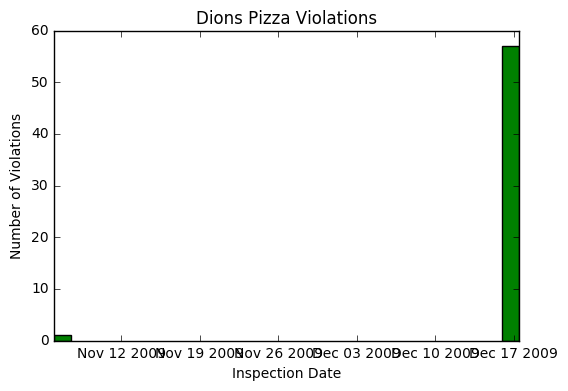

In [22]:
import matplotlib.pyplot as plt

c.execute("SELECT insp_date, COUNT(*) FROM food_inspections WHERE (bus_nature = 'RESTAURANT' OR bus_nature = 'BAR/RESTAURANT') AND facility_name = 'DIONS PIZZA' AND viol_desc NOT IN ('None', 'OBSERVATIONS', 'Complaint Not Substantiated', 'Complaint Substantiated', 'No Violations Found', 'Additional Comments', 'Delivered Informational Brochure') GROUP BY insp_date;")
rows = c.fetchall()
x = []
y = []
for r in rows:
    x.append(r[0]) 
    y.append(r[1])
    
plt.bar(x,y, width = 1.5, color = "green")
plt.title("Dions Pizza Violations")
plt.xlabel("Inspection Date")
plt.ylabel("Number of Violations")


Our graph of Dions Pizza Violations shows that Dions Pizza got slammed with violations on one date, December 16, 2009. Perhaps Dions Pizza has cleaned up its act since this data was collected.

Let's follow one more line of inquiry to understand the data a bit more. I wonder which facility types had the most violations? 

In [23]:
%%sql
SELECT bus_nature, COUNT(*)
FROM food_inspections
WHERE viol_desc NOT IN ('None', 'OBSERVATIONS', 'Complaint Not Substantiated', 'Complaint Substantiated', 'No Violations Found', 'Additional Comments', 'Delivered Informational Brochure')
GROUP BY bus_nature
ORDER BY COUNT DESC
LIMIT 5;

5 rows affected.


bus_nature,count
RESTAURANT,1726
FOOD SERVICE,220
BAR/RESTAURANT,190
GROCERY,175
CONVIENENCE STORE,123


## Bonus (10 points)

We have seen a few simple techniques for normalizing data in class.  Choose a column or set of columns that might be redundant and normalize them out to another table:

* Identify the columns to normalize in the source data table
* Create one or more new tables to hold the normalized records
* Extract data into the new tables
* Re-insert the new foreign key references from the new table into the source table

In [24]:
%%sql
SELECT DISTINCT owner_name
FROM food_inspections;

1852 rows affected.


owner_name
MIOZOTIL FERNANDES
FABIOLA VALENCIA
EDELWEISS
CHINA LUCK INC.
GERALDINE HAMMAD
AMERICAN LEGION POST 72
GARFIELD MARKET
AARON T SPAULDING LLC
Justin Carson
HUSSEIN AWAD


It looks like there are only 1852 distinct owner names, so let's normalize this data.

First, we'll create a new table, owners.

In [25]:
%%sql
DROP TABLE IF EXISTS owners;
CREATE TABLE owners (
    id SERIAL,
    name VARCHAR(128),
    owner_key VARCHAR(12)
);

Done.
Done.


[]

In [26]:
%%sql
INSERT INTO owners (name, owner_key)
SELECT owner_name, owner_key FROM (
    SELECT DISTINCT owner_name, owner_key FROM food_inspections
) as p;

1892 rows affected.


[]

In [ ]:
%%sql
SELECT *
FROM owners
LIMIT 10;

10 rows affected.


id,name,owner_key
1,HADI MASTAGHNI,45464
2,PAUL ROBLES,83344
3,ALL SEASONS CHILD CARE,252
4,ANTOINETTE COOK,67301
5,JESUS RUIZ GONZALES,84397
6,JERIS CAFE,20565
7,COACHES CORNER DECA,72792
8,KASSANDER LLC,80958
9,DRELLS INC,299
10,JEWISH COMM/CNTER GRTR ALBUQ,27261


Now that we have the new table, owners, we can add the new identifiers into the food_inspections table.

In [ ]:
%%sql
ALTER TABLE food_inspections 
ADD COLUMN owner_nid INTEGER;

In [ ]:
%%sql
UPDATE food_inspections AS f
SET owner_nid = o.id
FROM owners AS o
WHERE f.owner_name = o.name;